In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np

In [2]:
file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_30_08_2024.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%)
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,44.577909,41.9,20.597115,88.774038,1.555601,2.258611,9.974098,16.337546,2.152644,5.198889,8,0.083173,22.3,36.8
173,20240220_RHS6F91,44.204194,51.8,21.943542,83.979167,12.778484,2.440278,9.663950,7.199588,1.208125,5.905980,14,0.120833,23.8,37.2
174,20240222_RHQ2H03,51.895367,58.9,24.058857,73.000000,11.092253,2.813611,8.282822,23.873651,1.963810,5.817566,12,0.000000,29.0,53.2
175,20240226_RHS6F92,59.709741,54.6,23.718381,75.708263,8.025749,3.442500,10.503930,8.306538,1.892749,4.403178,8,0.000000,26.5,44.4


In [4]:
#X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)', 'Air_Humidity(%)', 'Number_Deliveries', 'Rain(mm)']]
#X = data[['Energy_Estimated(%)',]]
#X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)']]
#X = data[['Energy_Estimated(%)', 'Avg_Temperature(C)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Avg_Temperature(C)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Number_Deliveries']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Rain(mm)']]
#X = data[['Energy_Estimated(%)', 'Number_Deliveries']]
#X = data[['Energy_Estimated(%)', 'Rain(mm)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)', 'Number_Deliveries']]
X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)', 'Rain(mm)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)', 'Rain(mm)','Avg_Temperature(C)']]
#X = data[['Energy_Estimated(%)', 'Air_Humidity(%)', 'Distance_Traveled(km)', 'Rain(mm)','Number_Deliveries']]

y = data['Real_Energy_Expenditure(%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#model = SVR(kernel='rbf')
#model = SVR(kernel='poly', degree=3)
model = SVR(kernel='linear')

model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [8]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14.92473555123436
R-squared: 0.8157035563894555


In [9]:
# Avaliação com MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAPE: {mape * 100:.2f}%")

MAPE: 6.37%


In [10]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Aplicável apenas ao kernel 'poly'
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Melhor Conjunto de Hiperparâmetros Encontrado
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros Encontrados:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Melhores Hiperparâmetros Encontrados:
C: 10
degree: 2
gamma: scale
kernel: linear


In [11]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 6.16%
MSE: 15.0821
R²: 0.8138


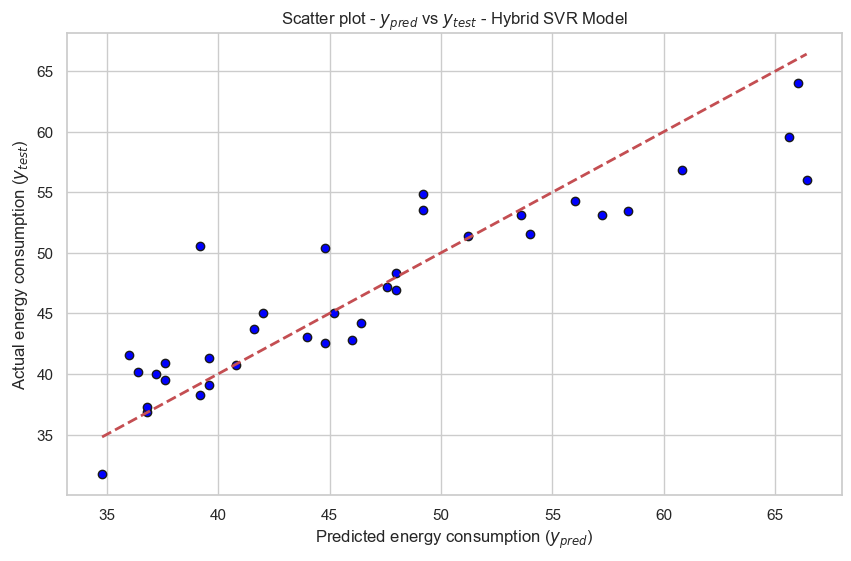

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Predicted energy consumption ($y_{pred}$)')
plt.ylabel('Actual energy consumption ($y_{test}$)')
plt.title('Scatter plot - $y_{pred}$ vs $y_{test}$ - Hybrid SVR Model')

plt.savefig('pred_SVR.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
residuos = [y_t - y_p for y_t, y_p in zip(y_test, y_pred)]

residuos = np.array(residuos, dtype=np.float64)

residuos = pd.Series(residuos)

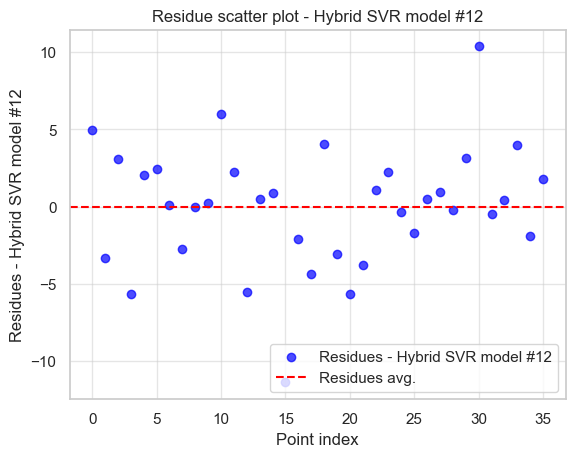

In [14]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid SVR model #12')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid SVR model #12')
plt.title('Residue scatter plot - Hybrid SVR model #12')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.5)

plt.savefig('scatter_plot_SVR.png', dpi=300, bbox_inches='tight')

plt.show()

In [15]:
mean = np.mean(residuos)
std = np.std(residuos)

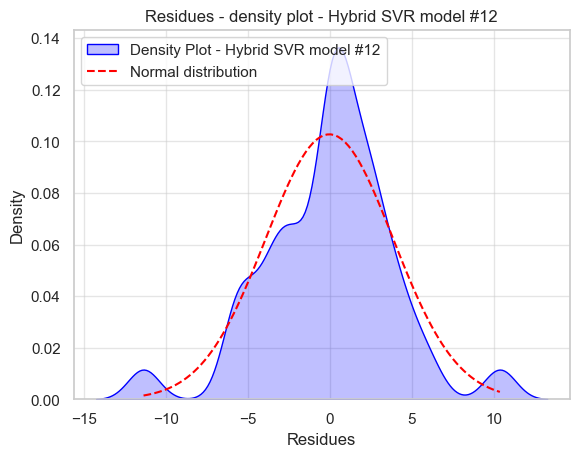

In [16]:
# Plotar a densidade dos resíduos
sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot - Hybrid SVR model #12', bw_adjust=0.5)

# Criar os valores de x para a curva de distribuição normal
x_values = np.linspace(min(residuos), max(residuos), 100)

# Plotar a curva de distribuição normal usando a média e o desvio padrão dos resíduos
plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Normal distribution')

# Configurações do gráfico
plt.title('Residues - density plot - Hybrid SVR model #12')
plt.xlabel('Residues')
plt.ylabel('Density')

# Exibir legenda e grade
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)

# Salvar o gráfico como imagem
plt.savefig('density_plot_SVR.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [17]:
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9713078141212463
Valor-p: 0.46233639121055603


In [18]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_v2 = sm.add_constant(X_test)

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_test_v2)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 4.392113961851048
Valor-p LM: 0.3555323183328282
Estatística F: 1.0769110962771313
Valor-p F: 0.3847655571454767


In [19]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 4

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.9634095164023682
DL: 1.382111111111111
DU: 1.6598888888888887
4-DL: 2.617888888888889
4-DU: 2.3401111111111113


In [20]:
n = X_test.shape[0]
k = X_test.shape[1]

In [21]:
y_test_mean = np.mean(y_test)

# Calcular SSR (Sum of Squares Regression)
SSR = np.sum((y_pred - y_test_mean) ** 2)

# Calcular SSE (Sum of Squares Error)
SSE = np.sum((y_test - y_pred) ** 2)

# Calcular SST (Sum of Squares Total)
SST = np.sum((y_test - y_test_mean) ** 2)

# Calcular MSR (Mean Square Regression)
MSR = SSR / k

# Calcular MSE (Mean Square Error)
MSE = SSE / (n - k - 1)

# Calcular a estatística F
F_statistic = MSR / MSE

# Exibir os resultados
print(f'SSR (Sum of Squares Regression): {SSR}')
print(f'SSE (Sum of Squares Error): {SSE}')
print(f'MSR (Mean Square Regression): {MSR}')
print(f'MSE (Mean Square Error): {MSE}')
print(f'Estatística F: {F_statistic}')

SSR (Sum of Squares Regression): 1900.4709692826777
SSE (Sum of Squares Error): 542.956064956875
MSR (Mean Square Regression): 475.11774232066944
MSE (Mean Square Error): 17.51471177280242
Estatística F: 27.1267805307794


In [23]:
from scipy.stats import f

df1 = k  
df2 = n - k - 1  

# Calcular o p-valor da estatística F
p_value = f.sf(F_statistic, df1, df2)

print(f'Prob (F-statistic): {p_value}')

Prob (F-statistic): 9.787315184231002e-10
